# Airline Passenger Satisfaction

### Tujuan
1. Menentukan faktor apa saja yang bisa mempengaruhi tingkat satisfication penumpang
2. Memprediksi kepuasan pelanggan
3. Memberikan rekomendasi untuk meningkatkan performa maskapai

### Dataset
https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?datasetId=522275&sortBy=voteCount

## 1. Data Preparation

### 1.1 Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

### 1.2 Import Data

In [ ]:
satisf = pd.read_csv('satistified_pass.csv')

In [ ]:
satisf.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
satisf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

#### Observ
- Data memiliki 25 kolom dan 103904 baris
- Ada missing values pada kolom `Arrival Delay in Minutes`sebesar 310
- Tipe data pada semua kolom sudah sesuai
- Kolom `Inflight wifi service`, `Departure/Arrival time convenient`, `Ease of Online booking`, `Gate location`, `Food and drink`, `Online boarding`, `Seat comfort`, `Inflight entertainment`, `On-board service`, `Leg room service`, `Leg room service`, `Baggage handling`, `Checkin service`, `Inflight service`, dan `Cleanliness` merupakan kolom dengan values berupa rank (1 - 5)

### 1.3 Checking & Handling Missing Values

In [ ]:
satisf.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [ ]:
#Checking percentage of null values
check = pd.DataFrame(satisf.isnull().sum().sort_values(), columns =['Null Values'])
check['Percent'] = (check['Null Values']/satisf.shape[0])*100
print(check)

                                   Null Values   Percent
Unnamed: 0                                   0  0.000000
Departure Delay in Minutes                   0  0.000000
Cleanliness                                  0  0.000000
Inflight service                             0  0.000000
Checkin service                              0  0.000000
Baggage handling                             0  0.000000
Leg room service                             0  0.000000
On-board service                             0  0.000000
Inflight entertainment                       0  0.000000
Seat comfort                                 0  0.000000
Online boarding                              0  0.000000
Food and drink                               0  0.000000
Ease of Online booking                       0  0.000000
Departure/Arrival time convenient            0  0.000000
Inflight wifi service                        0  0.000000
Flight Distance                              0  0.000000
Class                          

- Dikarenakan kolom `Arrival Delay in Minutes` memiliki nilai missing values sebesar 30%, maka dapat di handling dengan menggunakan mean

In [ ]:
# Membuat variabel dataframe baru untuk bisa dilihat perbandingannya
satisf_baru = satisf.copy()

In [ ]:
satisf_baru['Arrival Delay in Minutes'] = satisf_baru['Arrival Delay in Minutes'].fillna(satisf_baru['Arrival Delay in Minutes'].mean())

In [ ]:
satisf_baru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

### 1.4 Checking & Handling Duplicated Values

In [ ]:
satisf_baru.duplicated().sum()

0

- GOOD! Tidak ada duplicated values

### 1.5 Checking & Handling Unique Values

In [ ]:
#Mendrop kolom Unnamed dan id karena tidak diperlukan dalam modelling
satisf_baru.drop('Unnamed: 0', axis = 'columns', inplace = True)
satisf_baru.drop('id', axis = 'columns', inplace = True)

In [ ]:
satisf_baru

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [ ]:
for col in satisf_baru.columns:
  print(f'Value counts of -- {col}-- column')
  print(satisf_baru[col].value_counts(), '\n')

Value counts of -- Gender-- column
Female    52727
Male      51177
Name: Gender, dtype: int64 

Value counts of -- Customer Type-- column
Loyal Customer       84923
disloyal Customer    18981
Name: Customer Type, dtype: int64 

Value counts of -- Age-- column
39    2969
25    2798
40    2574
44    2482
42    2457
      ... 
74      47
76      45
79      42
78      33
85      17
Name: Age, Length: 75, dtype: int64 

Value counts of -- Type of Travel-- column
Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64 

Value counts of -- Class-- column
Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64 

Value counts of -- Flight Distance-- column
337     660
594     395
404     392
862     369
2475    369
       ... 
656       1
1364      1
887       1
1206      1
400       1
Name: Flight Distance, Length: 3802, dtype: int64 

Value counts of -- Inflight wifi service-- column
3    25868
2    25830
4    19794
1    17840
5    11469
0 

In [ ]:
for col in satisf_baru.columns:
  print(f'-----{col}-----')
  print(satisf_baru[col].unique(), '\n')

-----Gender-----
['Male' 'Female'] 

-----Customer Type-----
['Loyal Customer' 'disloyal Customer'] 

-----Age-----
[13 25 26 61 47 52 41 20 24 12 53 33 45 38  9 17 43 58 23 57 49 36 22 31
 15 35 67 37 40 34 39 50 29 54 21 28 27 69 60 48 59 46 30 66 64 44 51 32
 19 42 16 11 62  8 56 68 55 18 65 72 70 63 10  7 14 80 74 71 85 73 76 77
 75 79 78] 

-----Type of Travel-----
['Personal Travel' 'Business travel'] 

-----Class-----
['Eco Plus' 'Business' 'Eco'] 

-----Flight Distance-----
[ 460  235 1142 ...  974 1479  400] 

-----Inflight wifi service-----
[3 2 4 1 5 0] 

-----Departure/Arrival time convenient-----
[4 2 5 3 1 0] 

-----Ease of Online booking-----
[3 2 5 4 1 0] 

-----Gate location-----
[1 3 2 5 4 0] 

-----Food and drink-----
[5 1 2 4 3 0] 

-----Online boarding-----
[3 5 2 1 4 0] 

-----Seat comfort-----
[5 1 2 3 4 0] 

-----Inflight entertainment-----
[5 1 2 3 4 0] 

-----On-board service-----
[4 1 2 3 5 0] 

-----Leg room service-----
[3 5 4 2 1 0] 

-----Baggage handling

In [ ]:
satisf_baru

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [ ]:
satisf_baru['Customer Type'] = satisf_baru['Customer Type'].replace(['Loyal Customer','disloyal Customer'],['Loyal Customer','Disloyal Customer'])

## 2. Exploratory Data Analysis

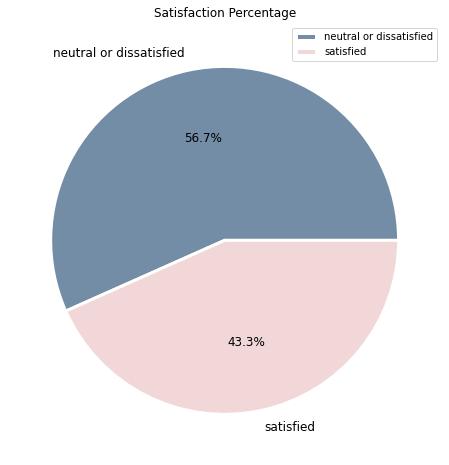

In [ ]:
#Persentase penumpang yang merasa puas dan tidak puas
colors = ['#748DA6', '#F2D7D9']

plt.figure(figsize=(15,8))
plt.pie(satisf_baru['satisfaction'].value_counts(),labels=satisf_baru['satisfaction'].value_counts().index,
       autopct='%1.1f%%',textprops={'fontsize':12}, colors = colors, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
plt.title('Satisfaction Percentage')
plt.legend()

In [ ]:
satisf_baru['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

- Dari total 103904, terdapat 56,7% atau 58879 penumpang dalam kategori netral atau tidak puas terhadap masskapai dan sebanyak 43,3% atau 45025 penumpang merasa puas terhadap maskapai 

### 2.1 Statistical Summary

#### 2.1.1 Numerical Column

In [ ]:
satisf_baru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [ ]:
#Mengelompokkan antara data kategorik dan numerikal
categorical = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
numerical = ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

In [ ]:
satisf_baru[numerical].describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.640909
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


1. Kolom `Age`, `Inflight wifi service`, `Departure/Arrival time convenient`, `Ease of Online booking`, `Gate location`, `Food and drink`, `Online boarding`, `Seat comfort`, `Inflight entertainment`, `On-board service`, `Leg room service`, `Baggage handling`, `Checkin service`, `Inflight service`, `Cleanliness` memiliki distribusi yang SIMETRIS karena perbedaan antara median dan mean tidak lebih dari 10-15%

2. Kolom `Flight Distance`, `Departure Delay in Minutes`, dan `Arrival Delay in Minutes` memiliki distribusi yang TIDAK SIMETRIS karena perbedaan antara median dan mean terlalu jauh.

In [ ]:
# Melihat insight pada kolom dengan jenis data categorical ordinal
rate = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']

In [ ]:
for x in rate:
  print(f'Value counts of -- {x}-- column')
  print(satisf_baru[x].value_counts(), '\n')

Value counts of -- Inflight wifi service-- column
3    25868
2    25830
4    19794
1    17840
5    11469
0     3103
Name: Inflight wifi service, dtype: int64 

Value counts of -- Departure/Arrival time convenient-- column
4    25546
5    22403
3    17966
2    17191
1    15498
0     5300
Name: Departure/Arrival time convenient, dtype: int64 

Value counts of -- Ease of Online booking-- column
3    24449
2    24021
4    19571
1    17525
5    13851
0     4487
Name: Ease of Online booking, dtype: int64 

Value counts of -- Gate location-- column
3    28577
4    24426
2    19459
1    17562
5    13879
0        1
Name: Gate location, dtype: int64 

Value counts of -- Food and drink-- column
4    24359
5    22313
3    22300
2    21988
1    12837
0      107
Name: Food and drink, dtype: int64 

Value counts of -- Online boarding-- column
4    30762
3    21804
5    20713
2    17505
1    10692
0     2428
Name: Online boarding, dtype: int64 

Value counts of -- Seat comfort-- column
4    31765
5   

1. Tingkat kepuasan kebanyakan penumpang terhadap layanan wifi dalam pesawat, kemudahan dalam pemesanan tiket online, lokasi gerbang dalam skala 3 (cukup baik)
2. Tingkat kepuasan kebanyakan penumpang terhadap waktu kedatangan pesawat, makanan dan minuman, pemesanan tiket secara online, kenyamanan kursi, hiburan dalam pesawat, layanan pesawat, ruang kaki antar kursi, penanganan bagasi, layanan checkin, layanan penerbangan, dan kebersihan dalam skala 4 (baik)
- **Secara keseluruhan service yang disediakan maskapai memiliki tingkat kepuasan pelanggan cukup baik**

#### 2.1.2 Categorical Column

In [ ]:
satisf_baru[categorical].describe()

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


1. Penumpang terbanyak adalah dengan jenis kelamin perempuan
2. Tipe customer yang seringkali menggunakan maskapai ini adalah tipe loyal customer
3. Kebanyakan tujuan penumpang menggunakan tranportasi pesawat dengan makapai ini adalah untuk tujuan bisnis
4. Business class merupakan tipe kelas yang seringkali dipilih oleh kebanyakan penumpang
5. Tingkat kepuasan penumpang terhadap maskapai kebanyakan netral atau tidak puas

### 2.2 Univariate Analysis

#### 2.2.1 Checking Outlier

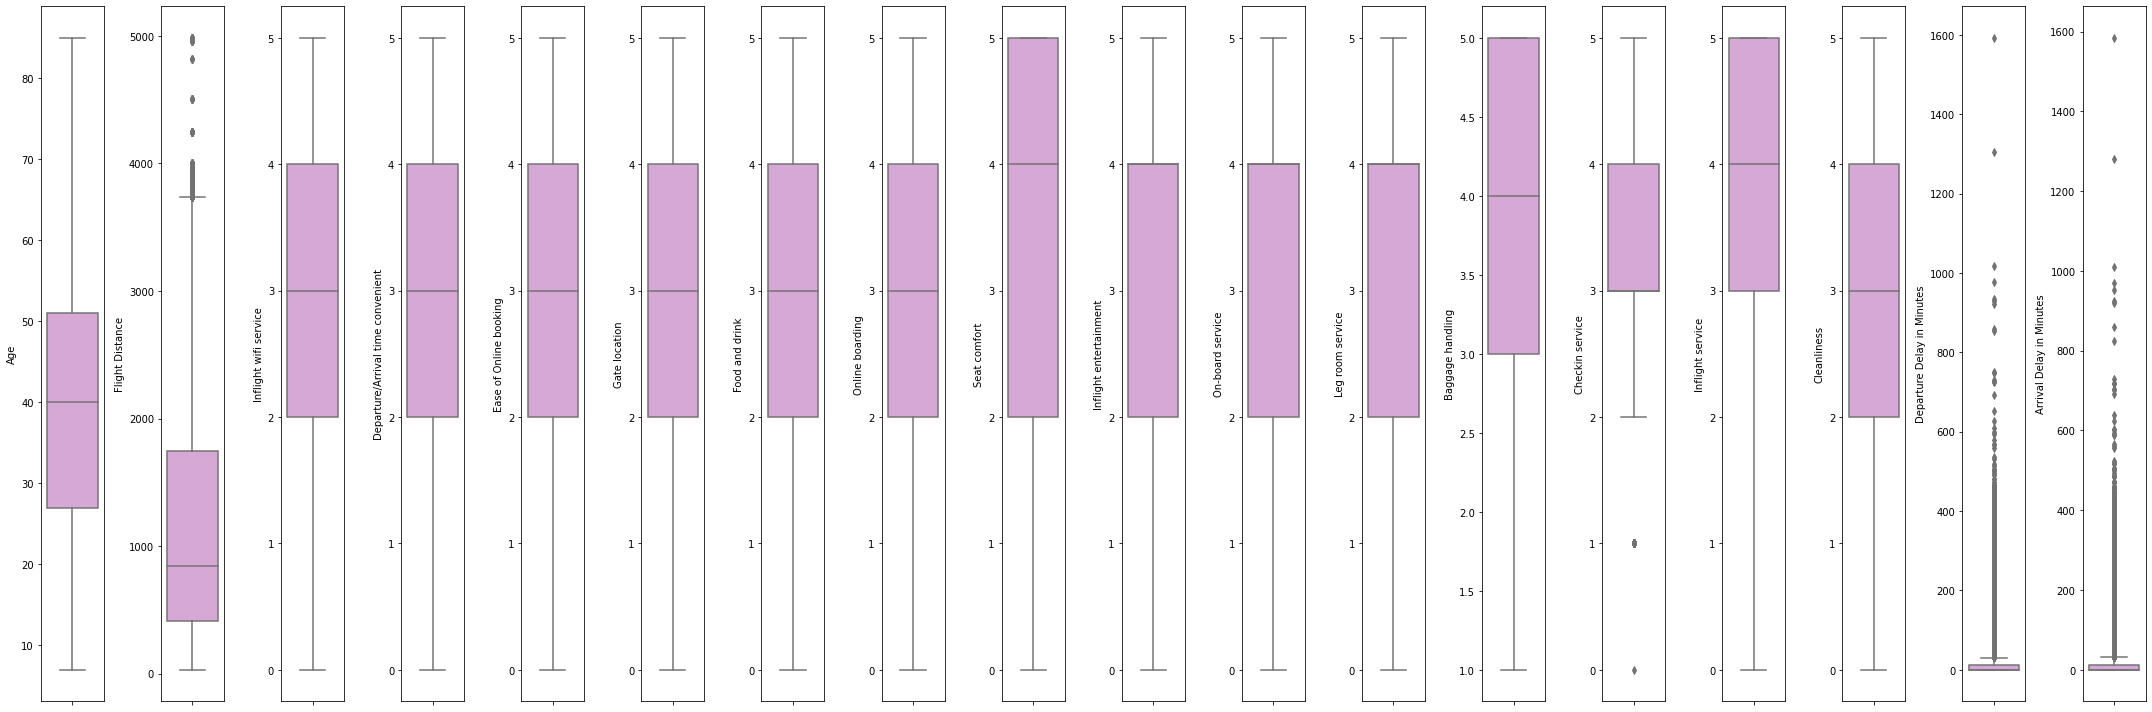

In [ ]:
# Checking outlier using BOXPLOT
plt.figure(figsize=(30,10))

# plotting
features = numerical
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=satisf_baru[features[i]], color='plum')
    plt.tight_layout()

In [ ]:
def check_outlier(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    
    new_column = []
    
    for x in data[column]:
        if x < q1 - 1.5 * iqr:
            new_column.append('outlier')
        elif x > q3 + 1.5 * iqr:
            new_column.append('outlier')
        else:
            new_column.append('not-outlier')
    
    return new_column

In [ ]:
# Mengcopy dataset untuk menambahkan kolom outlier
satisf_baru1 = satisf_baru.copy()

In [ ]:
satisf_baru1['outlier_flight_distance'] = check_outlier(data=satisf_baru1, column='Flight Distance')
satisf_baru1['outlier_checkin_service'] = check_outlier(data=satisf_baru1, column='Checkin service')
satisf_baru1['outlier_departure_delay'] = check_outlier(data=satisf_baru1, column='Departure Delay in Minutes')
satisf_baru1['outlier_arrival_delay'] = check_outlier(data=satisf_baru1, column='Arrival Delay in Minutes')

In [ ]:
#Cek jumlah outlier pada kolom
outlier = ['outlier_flight_distance', 'outlier_checkin_service', 'outlier_departure_delay', 'outlier_arrival_delay']
for x in outlier:
  print(f'Value counts of -- {x}-- column')
  print(satisf_baru1[x].value_counts(), '\n')

Value counts of -- outlier_flight_distance-- column
not-outlier    101613
outlier          2291
Name: outlier_flight_distance, dtype: int64 

Value counts of -- outlier_checkin_service-- column
not-outlier    91013
outlier        12891
Name: outlier_checkin_service, dtype: int64 

Value counts of -- outlier_departure_delay-- column
not-outlier    89375
outlier        14529
Name: outlier_departure_delay, dtype: int64 

Value counts of -- outlier_arrival_delay-- column
not-outlier    89950
outlier        13954
Name: outlier_arrival_delay, dtype: int64 



1. Kolom `Flight Distance` memiliki outlier sebesar 2291 baris (2,25%) dari total 103904. Berdasarkan boxplot, kolom ini memiliki outlier yang dalam kondisi tidak terlalu extreme.
2. Kolom `Checkin service` memiliki outlier sebesar 12891 baris (14,16%) dari total 103904. Berdasarkan boxplot, kolom ini memiliki outlier yang dalam kondisi tidak terlalu extreme namun setelah dilakukan pengecekan dapat terlihat bahwa jumlah baris yang mengalami outlier cukup banyak.
3. Kolom `Departure Delay in Minutes` memiliki outlier sebesar 14529 baris (16,26%) dari total 103904 dan kolom `Arrival Delay in Minutes` memiliki outlier sebesar 13954 baris (15,51%) dari total 103904. Berdasarkan boxplot, kedua kolom ini memiliki outlier yang dalam kondisi extreme.
- Untuk mengatasi permasalahan outlier diatas maka perlu dilakukan standardization atau log transformasi

#### 2.2.2 Checking Distribution

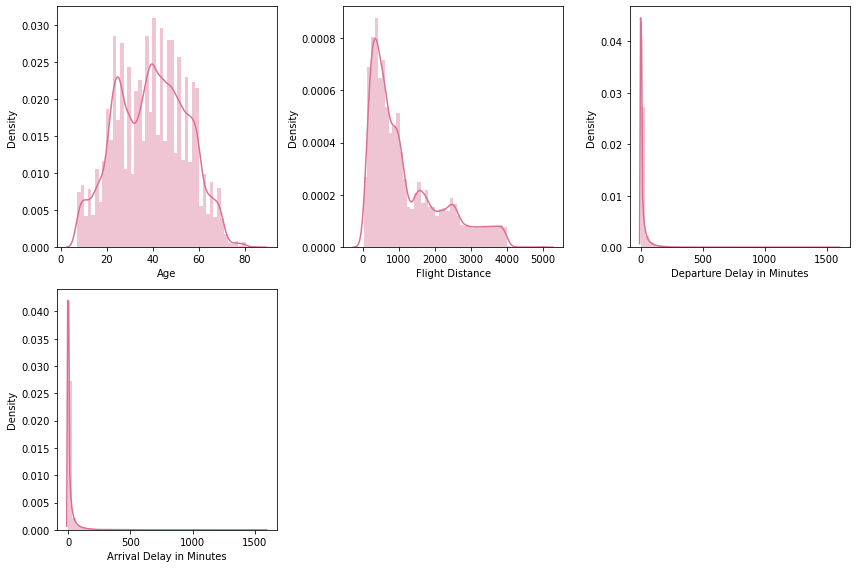

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

numerical1 = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

plt.figure(figsize=(12,8))

features = numerical1
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=satisf_baru[features[i]], color='palevioletred')
    plt.xlabel(features[i])
    plt.tight_layout()

1. Dari keempat kolom diatas, semuanya mengalami distribusi yang TIDAK SIMETRIS sehingga perlu dilakukan log transformasi
2. Kolom `Age` adalah kolom dengan distribusi yang hampir mendekati distribusi normal.
3. Kebanyakan penumpang yang menggunakan maskapai ini berusia sekitar 25 - 45 tahun
4. Kebanyakan para penumpang menggunakan maskapai ini untuk menuju lokasi dengan jarak 500 - 900 km
5. Keterlambatan keberangkatan dan keterlambatan kedatangan pesawat tidak lebih dari 150 menit

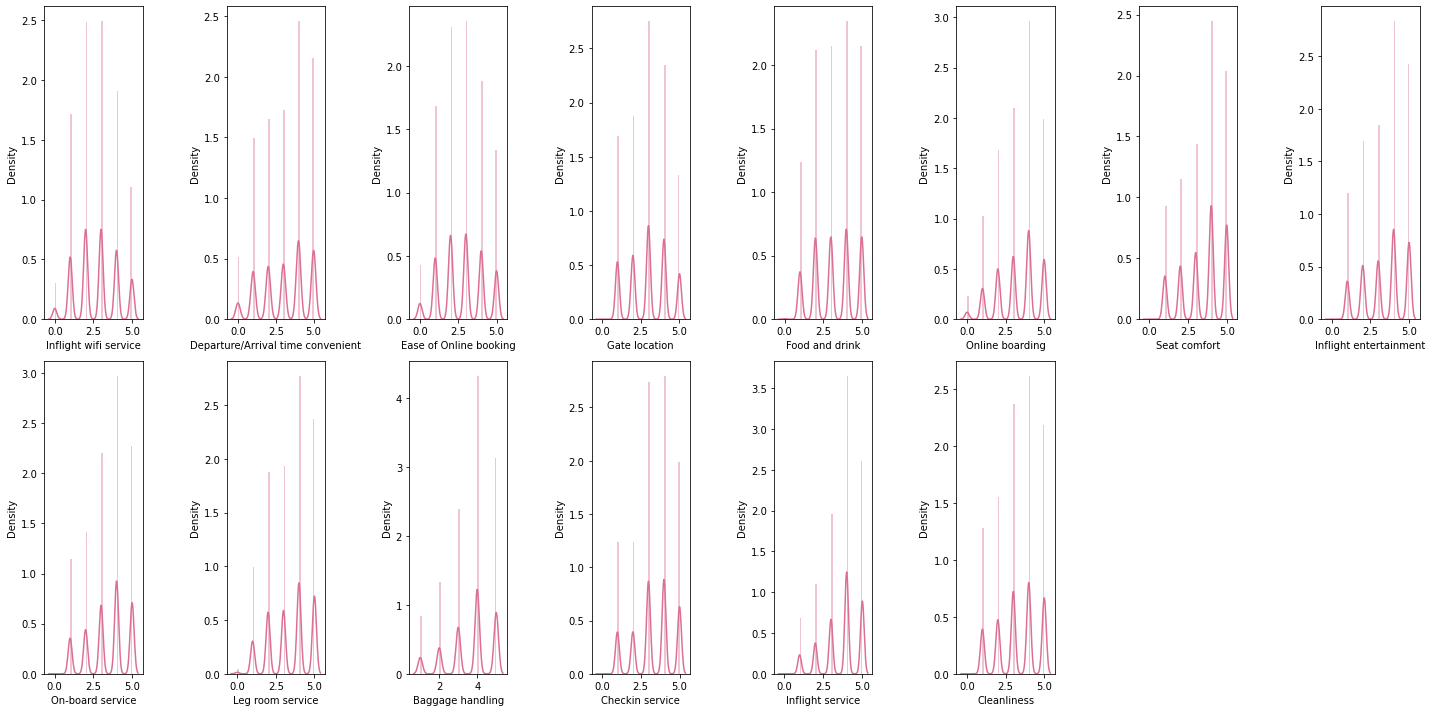

In [ ]:
numerical2 = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']
plt.figure(figsize=(20,10))

features = numerical2
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=satisf_baru[features[i]], color='palevioletred')
    plt.xlabel(features[i])
    plt.tight_layout()

- Dikarenakan interpretasi kolom `Inflight wifi service`, `Departure/Arrival time convenient`, `Ease of Online booking`, `Gate location`, `Food and drink`, `Online boarding`, `Seat comfort`, `Inflight entertainment`, `On-board service`, `Leg room service`, `Baggage handling`, `Checkin service`, `Inflight service`, `Cleanliness` merupakan fitur dengan nilai diskrit terbatas, maka dapat diabaikan
- Kebanyakan penumpang memberikan nilai antara 3 dan 4 terkait service yang diberikan maskapai

#### 2.2.3 Checking Imbalance Data

Text(0.5, 1.0, 'Satisfaction Level in Airlines')

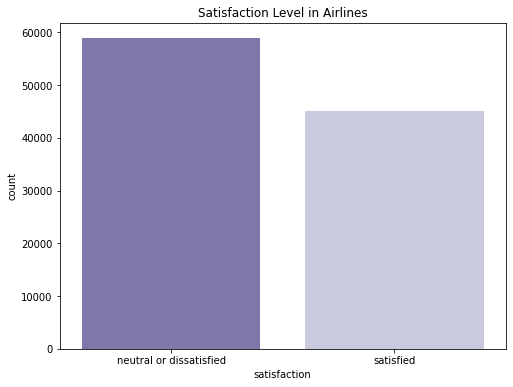

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.countplot(data=satisf_baru,
            x='satisfaction', palette ='Purples_r')
ax.set_title('Satisfaction Level in Airlines')

- Berdasarkan plot diatas, dapat dilihat bahwa distribusi antara neutral or disssatisfied dan satisfied memiliki perbandingan sekitar 5800 : 4500 atau sekitar 29% sehingga datanya cukup seimbang

### 2.3 Multivariate Analysis

#### 2.3.1 Heatmap Correlation

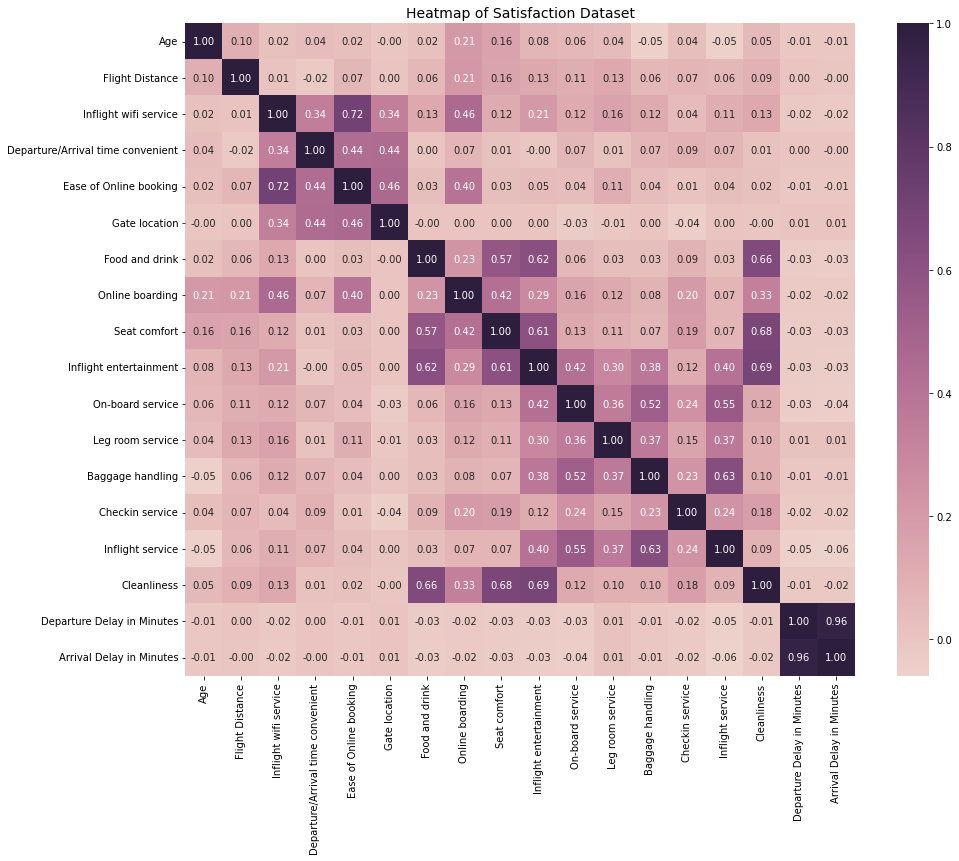

In [ ]:
correlation = satisf_baru.corr()
plt.figure(figsize=(15, 12))
colormap = sns.cubehelix_palette(as_cmap=True)
sns.heatmap(correlation, annot=True, fmt='.2f', cmap = colormap)
plt.title('Heatmap of Satisfaction Dataset', fontsize=14)
plt.show()

1. `Departure Delay ini Minutes` dan `Arrival Delay in Minutes` saling berkorelasi diantara keduanya
2. Apabila terjadi keterlambatan keberangkatan maka kedatangan juga mengalami keterlambatan.

### 2.4 Categorical Analysis

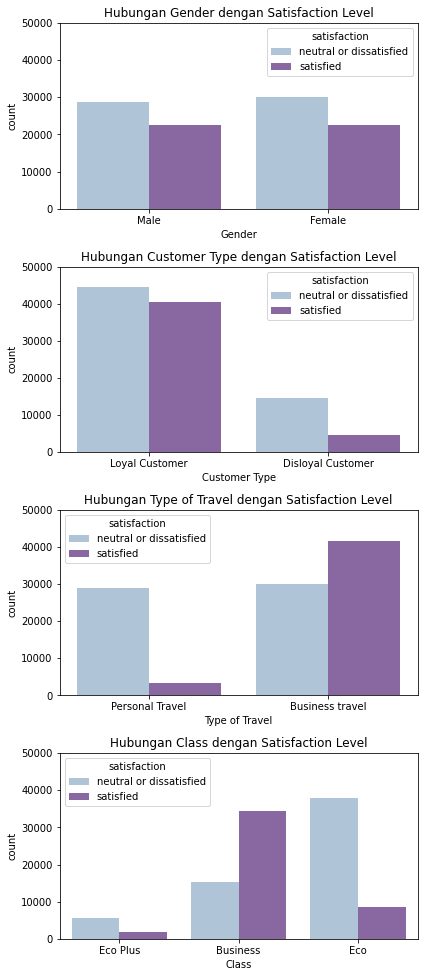

In [ ]:
plt.figure(figsize=(6,20))
categorical2 = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
features = categorical2

for i in range(0, len(features)):
    plt.subplot(6, len(features)//6 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.countplot(x = satisf_baru[features[i]] , hue='satisfaction', data=satisf_baru, palette = 'BuPu')
    plt.title(f'Hubungan {features[i]} dengan Satisfaction Level',fontsize=12)
    plt.ylim(0,50000)
    plt.tight_layout()

1. Tingkat kepuasan antara penumpang laki-laki dan perempuan memiliki jumlah yang hampir sama. kebanyakan dari mereka netral atau tidak puas
2. Kebanyakan penumpang adalah penumpang loyal dan dari mereka memiliki tingkat kepuasan netral atau tidak puas
3. Penumpang banyak yang menggunakan maskapai ini dengan tujuan perjalanan bisnis dan banyak dari mereka merasa puas
4. Penumpang yang memilih kelas bisnis banyak yang merasa puas daripada penumpang yang memilih kelas ekonomi.

### 2.5 Deep Dive Question

#### 1. Bagaimana pengaruh tingkat kepuasan penumpang berdasarkan umur?

Text(0.5, 1.0, 'Sebaran Umur berdasarkan Tingkat Kepuasan')

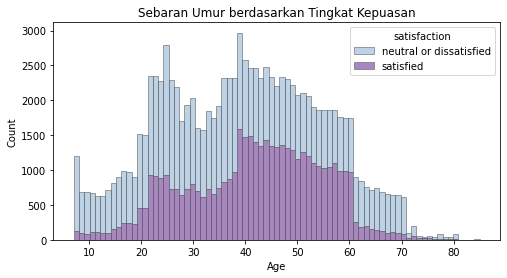

In [ ]:
plt.figure(figsize = (8,4))
sns.histplot(satisf_baru, x = 'Age', hue = 'satisfaction', multiple = 'stack', palette = 'BuPu', edgecolor = ".3", linewidth = .5)
plt.title('Sebaran Umur berdasarkan Tingkat Kepuasan')

In [ ]:
#membuat variabel dataframe satisf_baru2 untuk mapping kolom satisfaction
satisf_baru2 = satisf_baru.copy()
mapping_satisfaction = {'satisfied': 1,
                        'neutral or dissatisfied': 0}

satisf_baru2['satisfaction'] = satisf_baru2['satisfaction'].map(mapping_satisfaction)

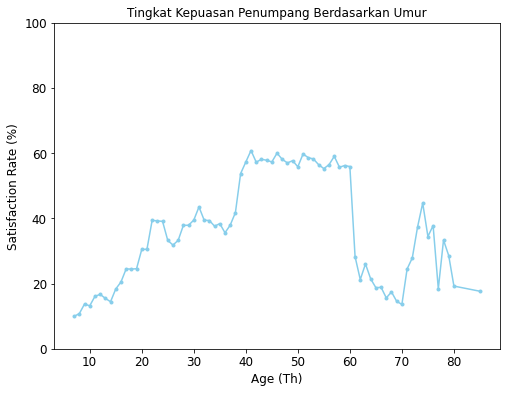

In [ ]:
percentage = satisf_baru2.groupby('Age')['satisfaction'].mean()*100
plt.figure(figsize = (8,6))
percentage.plot(kind='line', color = 'skyblue', marker='.')
plt.xticks(rotation=360, fontsize=12)
plt.yticks(rotation=360, fontsize=12)    
plt.xlabel('Age (Th)', fontsize=12)
plt.ylabel('Satisfaction Rate (%)', fontsize=12)
plt.title('Tingkat Kepuasan Penumpang Berdasarkan Umur')
plt.ylim(0,100)
plt.show()

1. Kebanyakan penumpang yang berusia antara 40-60 cenderung merasa puas terhadap maskapai
2. Penumpang yang berusia dibawah 40 tahun dan diatas 60 tahun cenderung merasa tidak puas terhadap maskapai

#### 2. Bagaimana pengaruh tipe perjalanan, tipe penumpang, dan tipe kelas terhadap tingkat kepuasan penumpang?

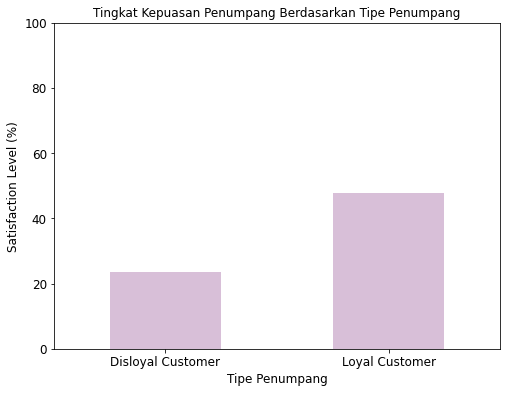

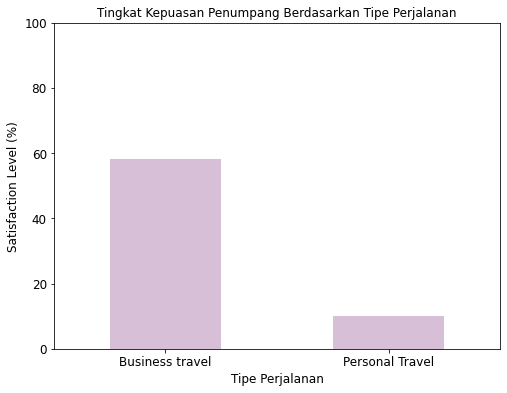

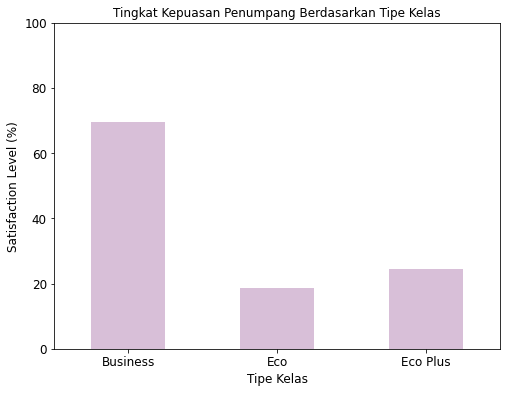

In [ ]:
# Make barchart based on Customer Type
percentage1 = satisf_baru2.groupby('Customer Type')['satisfaction'].mean()*100

plt.figure(figsize = (8,6))
percentage1.plot(kind='bar', color = 'thistle')
plt.xticks(rotation=360, fontsize=12)
plt.yticks(rotation=360, fontsize=12)    
plt.xlabel('Tipe Penumpang', fontsize=12)
plt.ylabel('Satisfaction Level (%)', fontsize=12)
plt.title('Tingkat Kepuasan Penumpang Berdasarkan Tipe Penumpang')
plt.ylim(0,100)
plt.show()

# Make barchart based on Type of Travel
percentage2 = satisf_baru2.groupby('Type of Travel')['satisfaction'].mean()*100

plt.figure(figsize = (8,6))
percentage2.plot(kind='bar', color = 'thistle')
plt.xticks(rotation=360, fontsize=12)
plt.yticks(rotation=360, fontsize=12)    
plt.xlabel('Tipe Perjalanan', fontsize=12)
plt.ylabel('Satisfaction Level (%)', fontsize=12)
plt.title('Tingkat Kepuasan Penumpang Berdasarkan Tipe Perjalanan')
plt.ylim(0,100)
plt.show()

# Make barchart based on Class
percentage3 = satisf_baru2.groupby('Class')['satisfaction'].mean()*100
plt.figure(figsize = (8,6))
percentage3.plot(kind='bar', color = 'thistle')
plt.xticks(rotation=360, fontsize=12)
plt.yticks(rotation=360, fontsize=12)    
plt.xlabel('Tipe Kelas', fontsize=12)
plt.ylabel('Satisfaction Level (%)', fontsize=12)
plt.title('Tingkat Kepuasan Penumpang Berdasarkan Tipe Kelas')
plt.ylim(0,100)
plt.show()


1. Golongan umur 41-60 tahun terbilang lebih merasa puas dibandingkan golongan umur muda
2. Penumpang loyal cenderung merasa puas terhadap maskapai ini dibandingkan dengan penumpang tidak loyal
3. Penumpang yang menggunakan maskapai ini dengan tujuan perjalanan bisnis lebih merasa puas dibandingkan dengan tujuan perjalanan pribadi
4. Penumpang yang menggunakan tipe kelas bisnis lebih merasa puas dibanding yang menggunakan tipe ekonomi dan ekonomi plus

#### 3. Bagaimana pengaruh antara tipe penumpang, jenis kelamin, tipe perjalanan, dan tipe kelas berdasarkan umur?

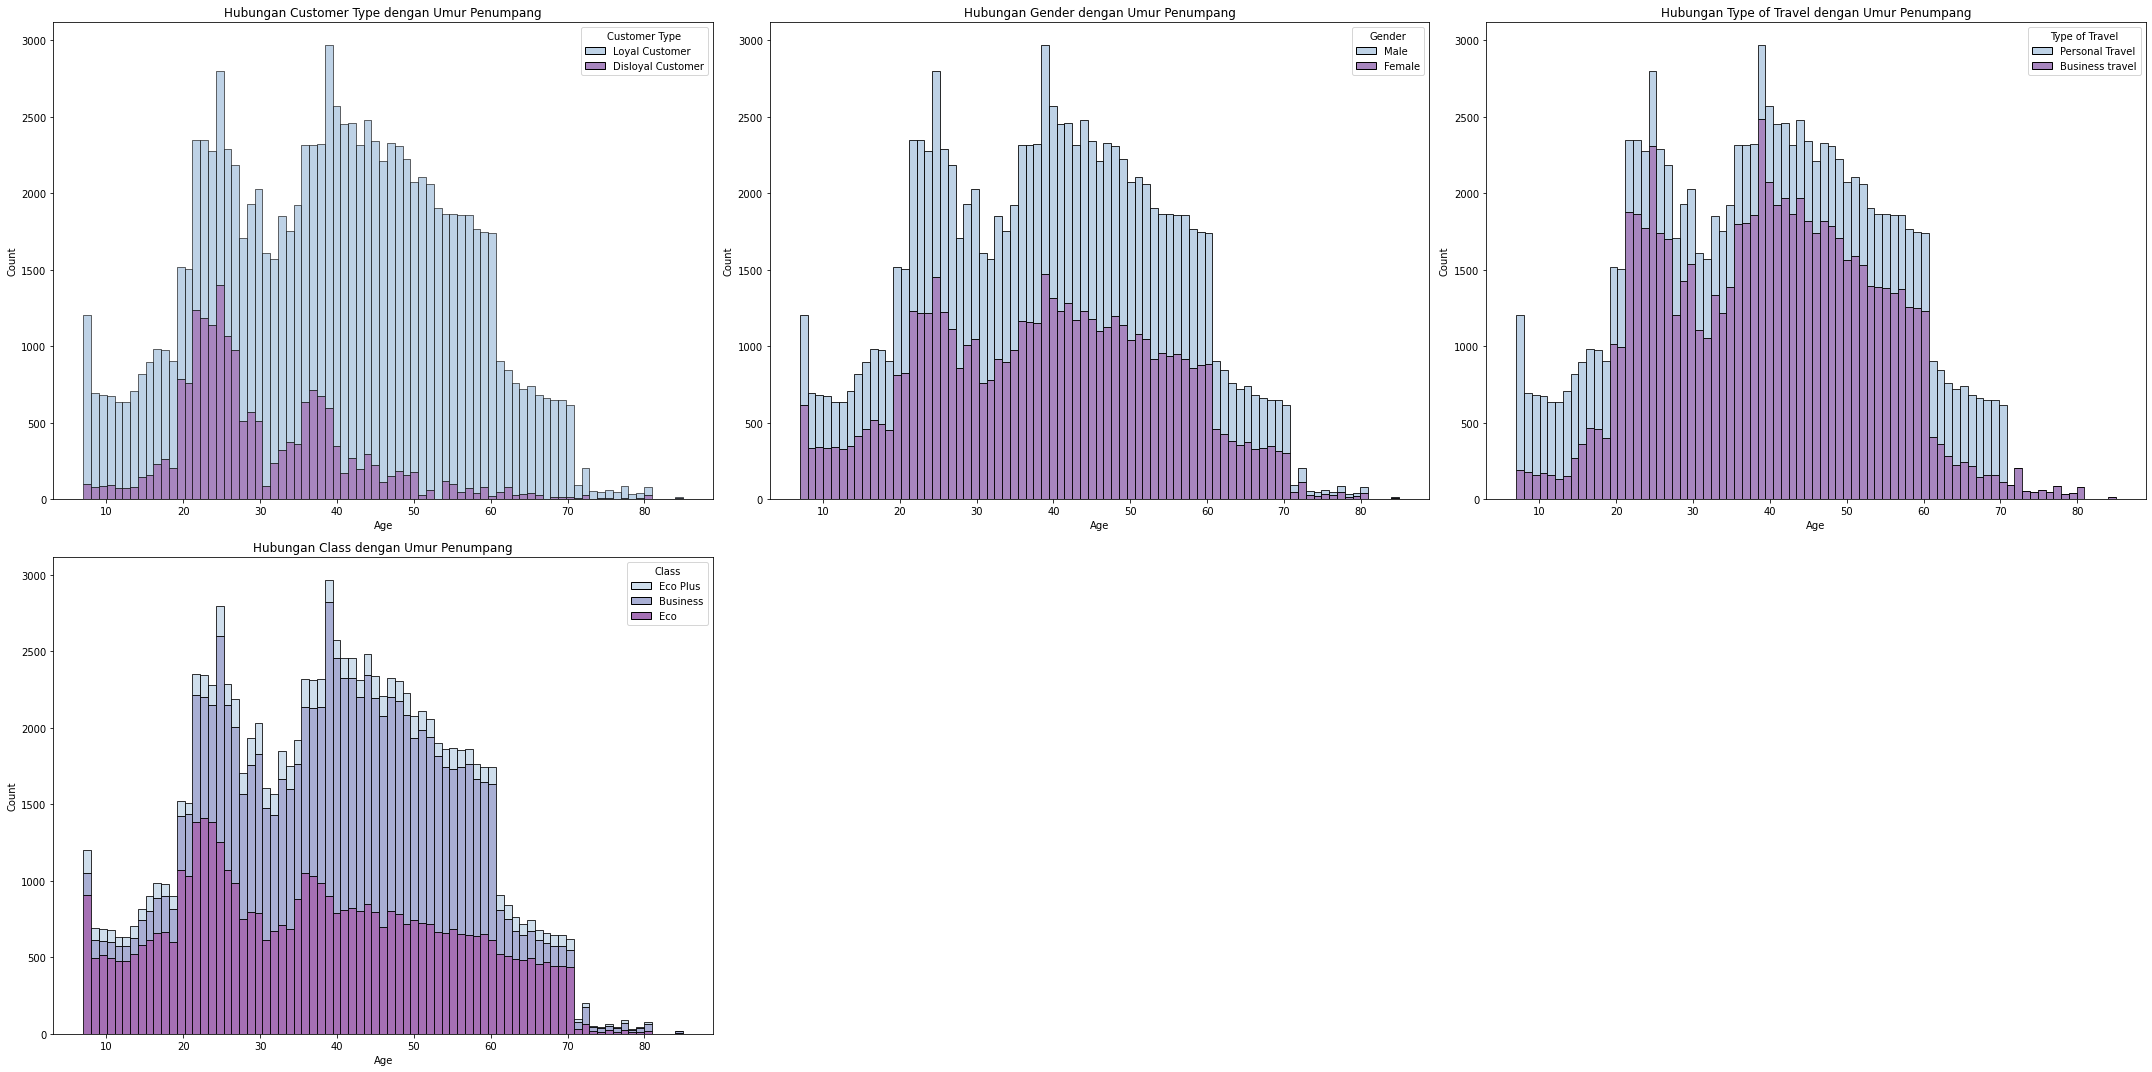

In [ ]:
# Menggunakan variabel dataframe satisf_baru yang kolom satisfactionnya masih berupa object
data2 = ['Customer Type', 'Gender', 'Type of Travel', 'Class']
plt.figure(figsize=(30,15))

features = data2
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.histplot(x=satisf_baru['Age'], hue = satisf_baru[features[i]], palette = 'BuPu', multiple = 'stack')
    plt.title(f'Hubungan {features[i]} dengan Umur Penumpang',fontsize=12)
    plt.xlabel('Age')
    plt.tight_layout()

1. Kebanyakan penumpang yang menggunakan maskapai ini adalah pria yang termasuk dalam loyal customer dan berusia sekitar 25-60 tahun
2. Penumpang dengan usia antara 20-60 tahun biasa menggunakan pesawat untuk urusan pribadi dan Penumpang > 60 tahun biasa menggunakan pesawat untuk tujuan bisnis
3. Kebanyakan penumpang dari segala umur sering menggunakan pesawat dengan kelas bisnis atau ekonomi plus
4. Penumpang yang berumur antara 25 - 60 tahun sering menggunakan tipe kelas eco plus dan business

#### 4. Bagaimana pengaruh service maskapai terhadap tingkat kepuasan penumpang?

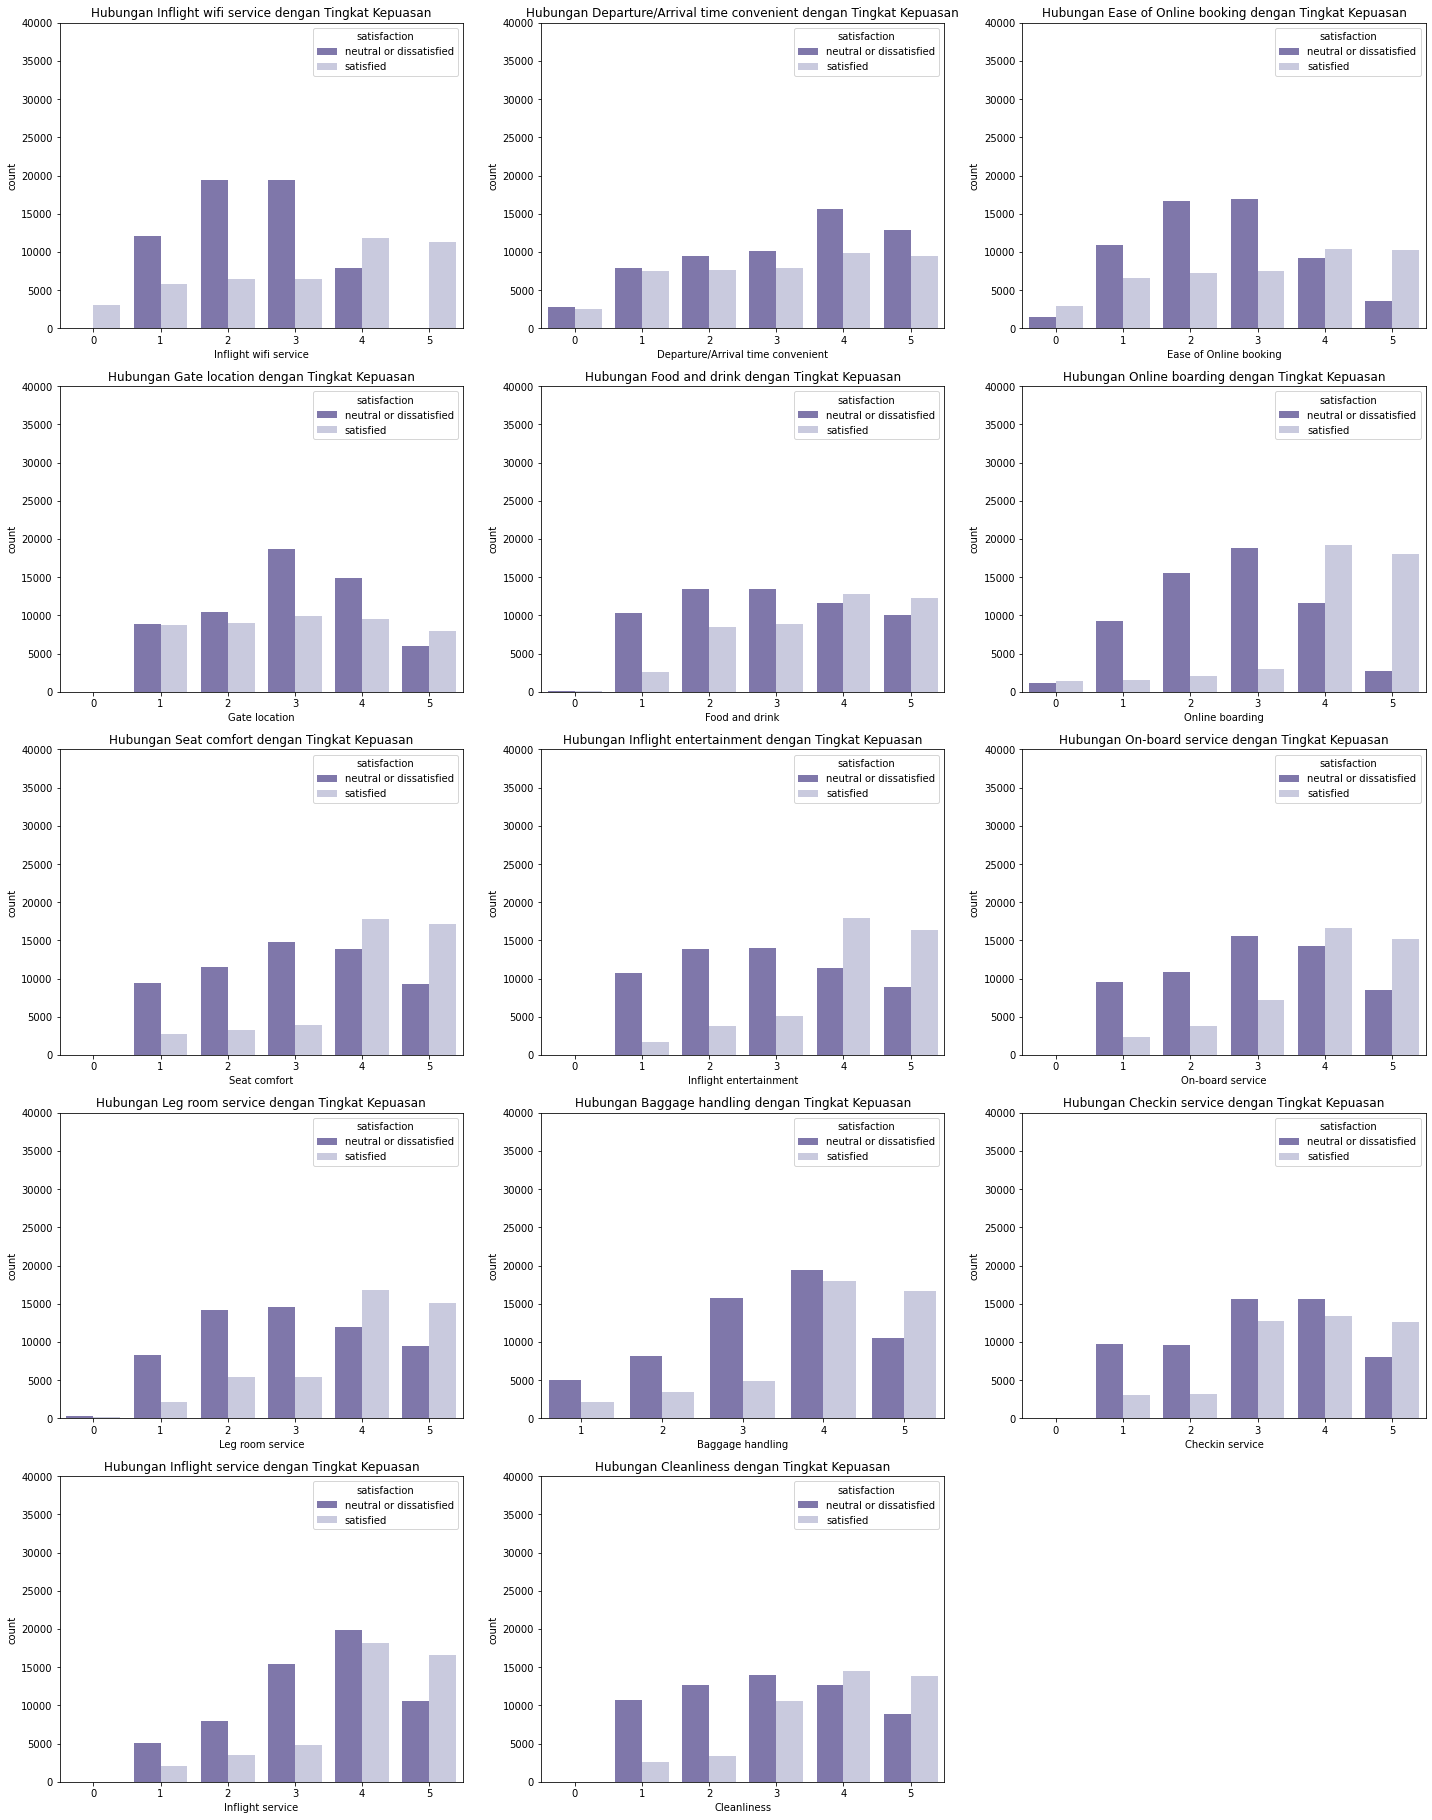

In [ ]:
data3 = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']
features = data3
plt.figure(figsize = (20,30))
for i in range(0, len(features)):
    plt.subplot(6, len(features)//6 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.countplot(x = satisf_baru[features[i]] , hue='satisfaction', data=satisf_baru, palette = 'Purples_r')
    plt.title(f'Hubungan {features[i]} dengan Tingkat Kepuasan',fontsize=12)
    plt.ylim(0,40000)
    plt.tight_layout()

1. Kebanyakan penumpang yang merasa puas terhadap maskapai sangat menyukai pelayanan dalam hal `Seat comfort`, `Online boarding`, `Inflight entertainment`, `On board service`, dan `Leg room service`
2. Kebanyakan penumpang yang netral atau tidak puas merasa pelayanan maskapai kurang maksimal dalam hal: `Inflight wifi service`, `Ease of online booking`, `Food and drink`, dan `Cleanliness`
3. Kebanyakan penumpang yang netral atau tidak puas merasa pelayanan maskapai cukup baik dalam hal: `Gate location`, `Baggage handling`, `Checkin service`, `Inflight service`, dan `Departure/arrival time convenient`

#### 5. Bagaimana pengaruh jarak perjalanan terhadap tipe perjalanan dan tipe kelas yang dipilih oleh penumpang loyal dan tidak loyal?

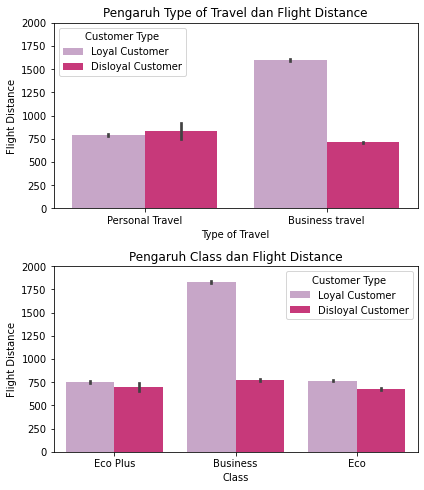

In [ ]:
#flight distance
data4 = ['Type of Travel', 'Class']
features = data4
plt.figure(figsize=(6,20))
for i in range(0, len(features)):
    plt.subplot(6, len(features)//6 + 1, i+1)
    sns.barplot(data=satisf_baru, x = satisf_baru[features[i]], y ='Flight Distance', hue='Customer Type', palette='PuRd' )
    plt.title(f'Pengaruh {features[i]} dan Flight Distance',fontsize=12)
    plt.ylim(0,2000)
    plt.tight_layout()

1. Penumpang loyal kebanyakan menggunakan maskapai ini untuk tujuan bisnis yang membutuhkan perjalanan sekitar 1600-1750 km
2. Penumpang loyal biasanya menggunakan tipe kelas bisnis karena jarak perjalanan yang jauh sekitar 1750 - 2000 km

#### 6. Bagaimana pengaruh keterlambatan keberangkatan dan kedatangan terhadap tingkat kepuasan penumpang?

In [ ]:
# Mengelompokkan values kolom departure delay in minutes
satisf_baru3 = satisf_baru2.copy()
duration_dept = []
for x in satisf_baru3['Departure Delay in Minutes']:
    if x <= 240 :
        duration_dept.append('0-240')
    elif x <= 480 :
        duration_dept.append('241-480')
    elif x <= 720 :
        duration_dept.append('481-720')
    elif x <= 960 :
        duration_dept.append('721-960')
    elif x <= 1200:
        duration_dept.append('961-1200')
    else:
        duration_dept.append('>1200')

satisf_baru3['duration_dept'] = duration_dept

In [ ]:
duration = ['0-240', '241-480', '481-720', '721-960', '961-1200', '>1200']
rate = (satisf_baru3.groupby('duration_dept')['satisfaction'].mean()*100).loc[duration]

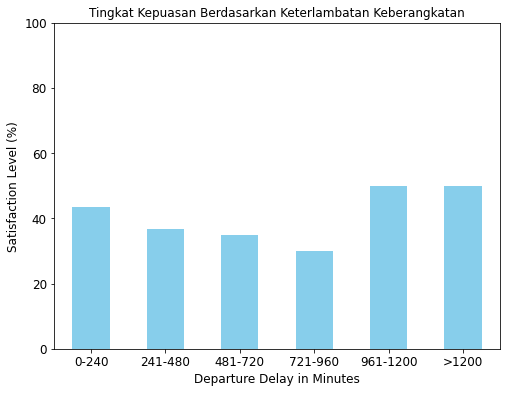

In [ ]:
plt.figure(figsize=(8,6))
rate.plot(kind = 'bar', color = 'skyblue')
plt.xticks(rotation=360, fontsize=12)
plt.yticks(rotation=360, fontsize=12)    
plt.xlabel('Departure Delay in Minutes', fontsize=12)
plt.ylabel('Satisfaction Level (%)', fontsize=12)
plt.title('Tingkat Kepuasan Berdasarkan Keterlambatan Keberangkatan')
plt.ylim(0,100)
plt.show()

In [ ]:
# Mengubah tipe kolom arrival delay in minutes
satisf_baru3['Arrival Delay in Minutes'] = satisf_baru3['Arrival Delay in Minutes'].astype(int)

In [ ]:
#Mengubah tipe kolom arrival delay in minutes dari int32 menjadi int64
d = dict.fromkeys(satisf_baru3.select_dtypes(np.int32).columns, np.int64)
satisf_baru3 = satisf_baru3.astype(d)

In [ ]:
#Mengelompokkan values kolom arrival delay in minutes
duration_arr = []
for x in satisf_baru3['Arrival Delay in Minutes']:
    if x <= 240 :
        duration_arr.append('0-240')
    elif x <= 480 :
        duration_arr.append('241-480')
    elif x <= 720 :
        duration_arr.append('481-720')
    elif x <= 960 :
        duration_arr.append('721-960')
    elif x <= 1200:
        duration_arr.append('961-1200')
    else:
        duration_arr.append('>1200')

satisf_baru3['duration_arr'] = duration_arr

In [ ]:
duration_arr = ['0-240', '241-480', '481-720', '721-960', '961-1200', '>1200']
rate_arr = (satisf_baru3.groupby('duration_arr')['satisfaction'].mean()*100).loc[duration_arr]

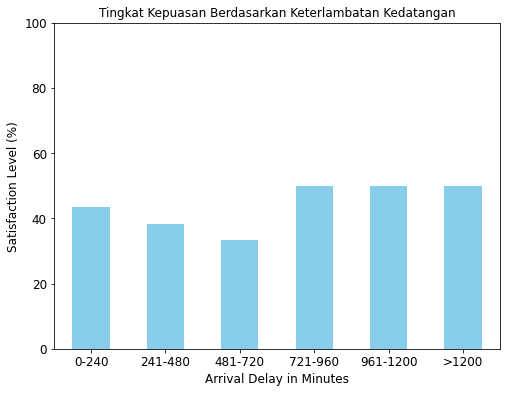

In [ ]:
plt.figure(figsize=(8,6))
rate_arr.plot(kind = 'bar', color = 'skyblue')
plt.xticks(rotation=360, fontsize=12)
plt.yticks(rotation=360, fontsize=12)    
plt.xlabel('Arrival Delay in Minutes', fontsize=12)
plt.ylabel('Satisfaction Level (%)', fontsize=12)
plt.title('Tingkat Kepuasan Berdasarkan Keterlambatan Kedatangan')
plt.ylim(0,100)
plt.show()

1. Rerata tingkat kepuasan tertinggi adalah pada keterlambatan keberangkatan pada menit ke 0-240, menit ke 721 - 960, 961-1200 dan menit ke >1200
2. Dalam hal ini bisa juga ditarik suatu asumsi bahwa tingkat kepuasan yang tinggi pada keterlambatan keberangkatan dengan durasi diatas 721 menit biasanya pihak maskapai memberikan informasi lebih awal.
3. Berdasarkan gambar diatas, tingkat kepuasan berdasarkan keterlambatan kedatangan dan keberangkatan tidak jauh berbeda karena memang berdasarkan heatmap correlation antara departure dan arrival saling berkorelasi cukup tinggi

#### 7. Bagaimana hubungan antara jarak perjalanan terhadap keterlambatan keberangkatan dan kedatangan?

Text(0, 0.5, 'Flight Distance')

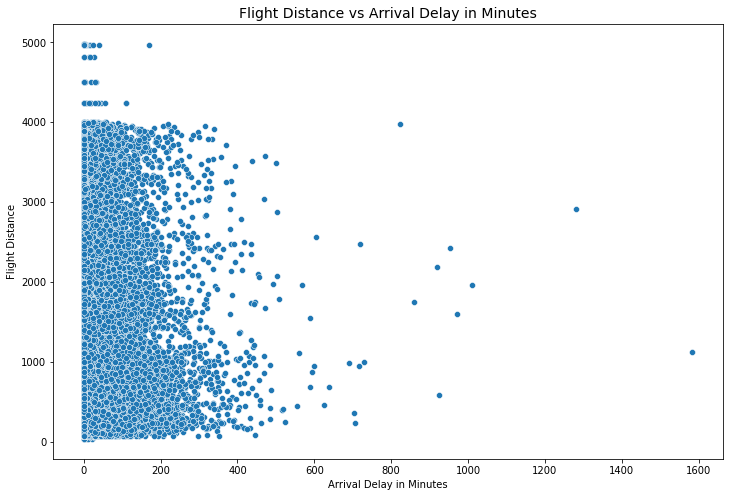

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=satisf_baru2,x='Arrival Delay in Minutes',y='Flight Distance')
plt.title('Flight Distance vs Arrival Delay in Minutes',fontsize=14)
plt.ylabel('Flight Distance')

Text(0, 0.5, 'Flight Distance')

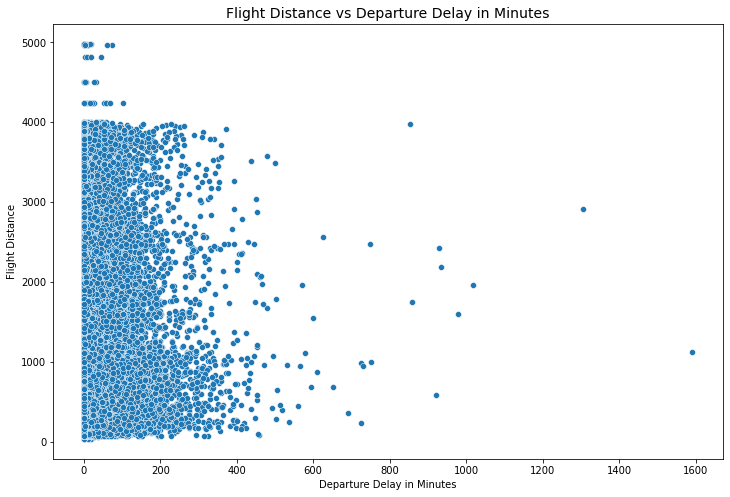

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=satisf_baru2,x='Departure Delay in Minutes',y='Flight Distance')
plt.title('Flight Distance vs Departure Delay in Minutes',fontsize=14)
plt.ylabel('Flight Distance')

1. Berdasarkan grafik diatas, dapat disimpulkan bahwa keterlambatan keberangkatan banyak terjadi untuk jarak penerbangan antara 0 - 4000 km dan lamanya antara 0-400 menit
2. Scatter plot yang diterapkan pada departure delay in minutes dan arrival delay in minutes hampir tidak bisa dibedakan. Hal ini dikarenakan korelasi antara keduanya sangat tinggi sehingga datanya hampir mendekati sama

#### 8. Apa saja service yang memiliki rate paling buruk dan paling baik?

In [ ]:
# Membuat dataframe baru untuk visualisasi menggunakan dataframe awal yaitu satisf
def service(i, a = 'id'):
    b = (satisf[(satisf[i]==0) | (satisf[i]==5)]
           .groupby(i)
           .agg(Pemilih=('id','count'))
           .reset_index()
           .sort_values('Pemilih',ascending=False)
           .head(10)
          )
    b = b.rename(columns = {i : 'Rate' })
    return b

In [ ]:
# Kolom Inflight wifi service
rate1 = service('Inflight wifi service')
rate1 = rate1.rename(columns = {'Pemilih' : 'Inflight wifi service' })
rate1

,Rate,Inflight wifi service
1,5,11469
0,0,3103


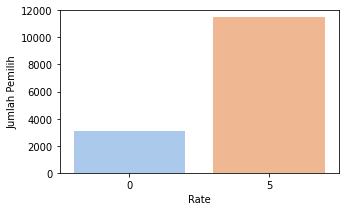

In [ ]:
plt.figure(figsize=(5,3))
sns.barplot(data=rate1, x='Rate', y='Inflight wifi service', palette = 'pastel')
plt.ylabel('Jumlah Pemilih')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Kolom Depart/Arrival time convenient
rate2 = service('Departure/Arrival time convenient')
rate2 = rate2.rename(columns = {'Pemilih' : 'Depart/Arrival time convenient' })
rate2

,Rate,Depart/Arrival time convenient
1,5,22403
0,0,5300


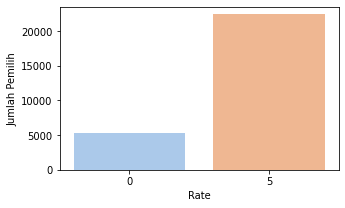

In [ ]:
plt.figure(figsize=(5,3))
sns.barplot(data=rate2, x='Rate', y='Depart/Arrival time convenient', palette = 'pastel')
plt.ylabel('Jumlah Pemilih')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Kolom Ease of Online booking
rate3 = service('Ease of Online booking')
rate3 = rate3.rename(columns = {'Pemilih' : 'Ease of Online booking' })
rate3

,Rate,Ease of Online booking
1,5,13851
0,0,4487


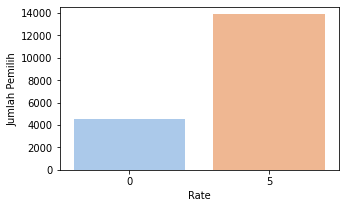

In [ ]:
plt.figure(figsize=(5,3))
sns.barplot(data=rate3, x='Rate', y='Ease of Online booking', palette = 'pastel')
plt.ylabel('Jumlah Pemilih')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Kolom Gate Location
rate4 = service('Gate location')
rate4 = rate4.rename(columns = {'Pemilih' : 'Gate location' })
rate4

,Rate,Gate location
1,5,13879
0,0,1


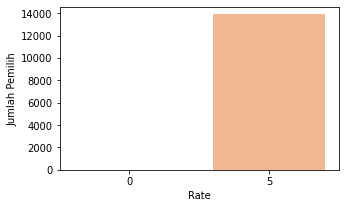

In [ ]:
plt.figure(figsize=(5,3))
sns.barplot(data=rate4, x='Rate', y='Gate location', palette = 'pastel')
plt.ylabel('Jumlah Pemilih')
plt.xticks(rotation=0)
plt.show()

In [ ]:
#Kolom Food and drink
rate5 = service('Food and drink')
rate5 = rate5.rename(columns = {'Pemilih' : 'Food and drink' })
rate5

,Rate,Food and drink
1,5,22313
0,0,107


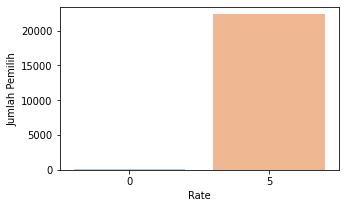

In [ ]:
plt.figure(figsize=(5,3))
sns.barplot(data=rate5, x='Rate', y='Food and drink', palette = 'pastel')
plt.ylabel('Jumlah Pemilih')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Kolom Online Boarding
rate6 = service('Online boarding')
rate6 = rate6.rename(columns = {'Pemilih' : 'Online boarding' })
rate6

,Rate,Online boarding
1,5,20713
0,0,2428


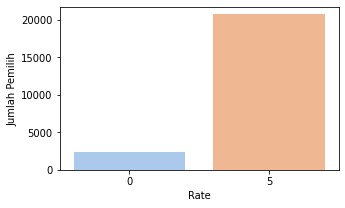

In [ ]:
plt.figure(figsize=(5,3))
sns.barplot(data=rate6, x='Rate', y='Online boarding', palette = 'pastel')
plt.ylabel('Jumlah Pemilih')
plt.xticks(rotation=0)
plt.show()

In [ ]:
#Kolom Seat comfort
rate7 = service('Seat comfort')
rate7 = rate7.rename(columns = {'Pemilih' : 'Seat comfort' })
rate7

,Rate,Seat comfort
1,5,26470
0,0,1


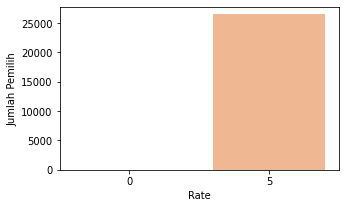

In [ ]:
plt.figure(figsize=(5,3))
sns.barplot(data=rate7, x='Rate', y='Seat comfort', palette = 'pastel')
plt.ylabel('Jumlah Pemilih')
plt.xticks(rotation=0)
plt.show()

In [ ]:
#Kolom Inflight entertainment
rate8 = service('Inflight entertainment')
rate8 = rate8.rename(columns = {'Pemilih' : 'Inflight entertainment' })
rate8

,Rate,Inflight entertainment
1,5,25213
0,0,14


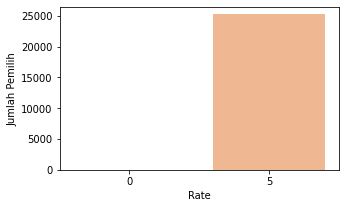

In [ ]:
plt.figure(figsize=(5,3))
sns.barplot(data=rate8, x='Rate', y='Inflight entertainment', palette = 'pastel')
plt.ylabel('Jumlah Pemilih')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Kolom On-board service
rate9 = service('On-board service')
rate9 = rate9.rename(columns = {'Pemilih' : 'On-board service' })
rate9

,Rate,On-board service
1,5,23648
0,0,3


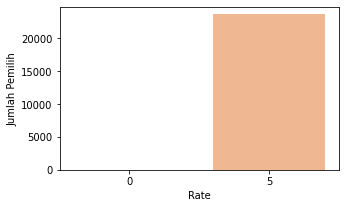

In [ ]:
plt.figure(figsize=(5,3))
sns.barplot(data=rate9, x='Rate', y='On-board service', palette = 'pastel')
plt.ylabel('Jumlah Pemilih')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Kolom Leg room service
rate10 = service('Leg room service')
rate10 = rate10.rename(columns = {'Pemilih' : 'Leg room service' })
rate10

,Rate,Leg room service
1,5,24667
0,0,472


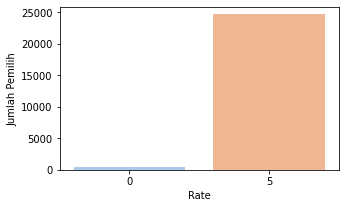

In [ ]:
plt.figure(figsize=(5,3))
sns.barplot(data=rate10, x='Rate', y='Leg room service', palette = 'pastel')
plt.ylabel('Jumlah Pemilih')
plt.xticks(rotation=0)
plt.show()

In [ ]:
#Kolom Baggage handling
rate11 = service('Baggage handling')
rate11 = rate11.rename(columns = {'Pemilih' : 'Baggage handling'})
rate11

,Rate,Baggage handling
0,5,27131


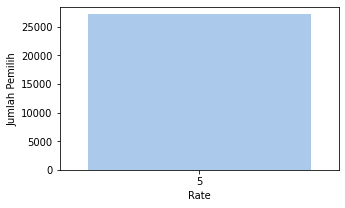

In [ ]:
plt.figure(figsize=(5,3))
sns.barplot(data=rate11, x = 'Rate', y = 'Baggage handling', palette = 'pastel')
plt.ylabel('Jumlah Pemilih')
plt.xticks(rotation=0)
plt.show()

In [ ]:
#Kolom Checkin service
rate12 = service('Checkin service')
rate12 = rate12.rename(columns = {'Pemilih' : 'Checkin service' })
rate12

,Rate,Checkin service
1,5,20619
0,0,1


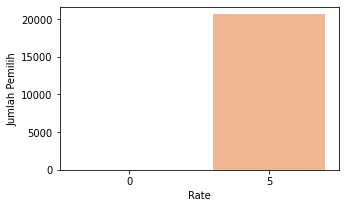

In [ ]:
plt.figure(figsize=(5,3))
sns.barplot(data=rate12, x = 'Rate', y = 'Checkin service', palette = 'pastel')
plt.ylabel('Jumlah Pemilih')
plt.xticks(rotation=0)
plt.show()

In [ ]:
#Kolom Inflight service
rate13 = service('Inflight service')
rate13 = rate13.rename(columns = {'Pemilih' : 'Inflight service' })
rate13

,Rate,Inflight service
1,5,27116
0,0,3


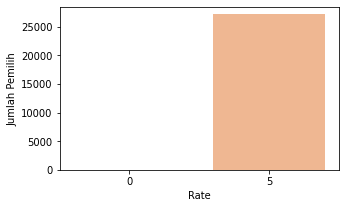

In [ ]:
plt.figure(figsize=(5,3))
sns.barplot(data=rate13, x = 'Rate', y = 'Inflight service', palette = 'pastel')
plt.ylabel('Jumlah Pemilih')
plt.xticks(rotation=0)
plt.show()

In [ ]:
#Kolom Cleanliness
rate14 = service('Cleanliness')
rate14 = rate14.rename(columns = {'Pemilih' : 'Cleanliness' })
rate14

,Rate,Cleanliness
1,5,22689
0,0,12


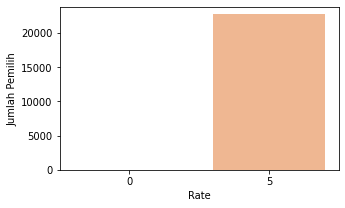

In [ ]:
plt.figure(figsize=(5,3))
sns.barplot(data=rate14, x = 'Rate', y = 'Cleanliness', palette = 'pastel')
plt.ylabel('Jumlah Pemilih')
plt.xticks(rotation=0)
plt.show()

- Secara umum, service yang diberikan maskapai kepada penumpang overall termasuk dalam kategori yang baik sehingga perlu dipertahankan dan dilakukan peninjauan kembali terkait service yang memang dirasa kurang 

In [ ]:
# Menggabungkan beberapa dataframe menjadi satu dataframe untuk bisa mengambil kesimpulan
from functools import reduce
dfbaru_satisf1 =[rate1, rate2, rate3, rate4, rate5, rate6, rate7, rate8, rate9, rate10, rate11, rate12, rate13, rate14]
satisf_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Rate'],
                                            how='outer'), dfbaru_satisf1)

In [ ]:
satisf_merged

,Rate,Inflight wifi service,Depart/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,5,11469,22403,13851,13879,22313,20713,26470,25213,23648,24667,27131.0,20619,27116,22689
1,0,3103,5300,4487,1,107,2428,1,14,3,472,NaN,1,3,12


1. Berdasarkan gambar dan tabel rekapitulasi, didapatkan bahwa perlu ditingkatkannya pelayanan terkait dengan `Depart/Arrival time convenient`, `Ease of Online booking`, dan `Online boarding` dikarenakan banyak sekali penumpang yang memberikan rate kecil
2. Pelayanan `Food and drink` dan `Leg room service` masih termasuk dalam kategori baik karena hanya ada beberapa penumpang yang memberikan rate kecil namun pada kedua pelayanan ini masih harus ditinjau kembali
3. Pelayanan pada `Gate location`, `Seat comfort`, `On-board service`, `Baggage handling`, `Checkin service`, `Inflight service`, `Cleanliness` termasuk dalam kategori sangat baik dan perlu dipertahankan

#### 9. Bagaimana rerata jarak tujuan penumpang terhadap tipe kelas pesawat yang dipilih?

In [ ]:
flight = (satisf
          .groupby('Class')
          .agg(mean_flight=('Flight Distance','mean'))
          .reset_index()
          .sort_values('mean_flight',ascending=False)
          .head(10)
         )
flight

,Class,mean_flight
0,Business,1675.976925
2,Eco Plus,747.125567
1,Eco,743.439748


(0.0, 1800.0)

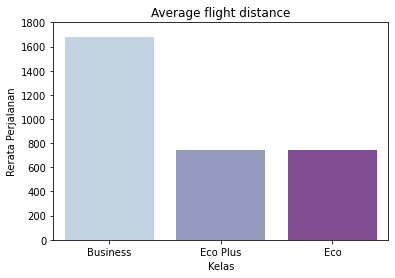

In [ ]:
sns.barplot(data= flight, x = 'Class', y = 'mean_flight', palette = 'BuPu')
plt.xticks(rotation=0)
plt.title('Average flight distance')
plt.xlabel('Kelas')
plt.ylabel('Rerata Perjalanan')
plt.ylim(0,1800)

1. Tipe kelas bisnis merupakan tipe kelas yang banyak dipilih penumpang dengan rerata jarak perjalanannya adalah sebesar 1675,98 km

## 3. Data Preprocessing

In [ ]:
# Mengubah tipe kolom arrival delay in minutes
satisf_baru2['Arrival Delay in Minutes'] = satisf_baru2['Arrival Delay in Minutes'].astype(int)

In [ ]:
#Mengubah tipe kolom arrival delay in minutes dari int32 menjadi int64
d = dict.fromkeys(satisf_baru2.select_dtypes(np.int32).columns, np.int64)
satisf_baru2 = satisf_baru2.astype(d)

In [ ]:
satisf_baru2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Gender                             103904 non-null  object
 1   Customer Type                      103904 non-null  object
 2   Age                                103904 non-null  int64 
 3   Type of Travel                     103904 non-null  object
 4   Class                              103904 non-null  object
 5   Flight Distance                    103904 non-null  int64 
 6   Inflight wifi service              103904 non-null  int64 
 7   Departure/Arrival time convenient  103904 non-null  int64 
 8   Ease of Online booking             103904 non-null  int64 
 9   Gate location                      103904 non-null  int64 
 10  Food and drink                     103904 non-null  int64 
 11  Online boarding                    103904 non-null  

In [ ]:
# drop Depaarture delay in minutes
satisf_baru2.drop('Departure Delay in Minutes', axis = 'columns', inplace = True)

### 3.1 Encoding

In [ ]:
column_onehot = ['Gender', 'Customer Type', 'Type of Travel']
satisf_baru2 = pd.get_dummies(satisf_baru2, columns = column_onehot)

In [ ]:
satisf_baru2

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction,Gender_Female,Gender_Male,Customer Type_Disloyal Customer,Customer Type_Loyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel
0,13,Eco Plus,460,3,4,3,1,5,3,5,...,5,5,18,0,0,1,0,1,0,1
1,25,Business,235,3,2,3,3,1,3,1,...,4,1,6,0,0,1,1,0,1,0
2,26,Business,1142,2,2,2,2,5,5,5,...,4,5,0,1,1,0,0,1,1,0
3,25,Business,562,2,5,5,5,2,2,2,...,4,2,9,0,1,0,0,1,1,0
4,61,Business,214,3,3,3,3,4,5,5,...,3,3,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,Eco,192,2,1,2,3,2,2,2,...,3,2,0,0,1,0,1,0,1,0
103900,49,Business,2347,4,4,4,4,2,4,5,...,5,4,0,1,0,1,0,1,1,0
103901,30,Business,1995,1,1,1,3,4,1,5,...,5,4,14,0,0,1,1,0,1,0
103902,22,Eco,1000,1,1,1,5,1,1,1,...,4,1,0,0,1,0,1,0,1,0


In [ ]:
#Rank Encoding
class_dict = {
    'Eco':1,
    'Eco Plus':2,
    'Business':3
}

In [ ]:
#map = kolom class dipetakan ke class_dict
satisf_baru2['Class'] = satisf_baru2['Class'].map(class_dict)

In [ ]:
#Cek apakah semua kolom sudah numerik
satisf_baru2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   Age                                103904 non-null  int64
 1   Class                              103904 non-null  int64
 2   Flight Distance                    103904 non-null  int64
 3   Inflight wifi service              103904 non-null  int64
 4   Departure/Arrival time convenient  103904 non-null  int64
 5   Ease of Online booking             103904 non-null  int64
 6   Gate location                      103904 non-null  int64
 7   Food and drink                     103904 non-null  int64
 8   Online boarding                    103904 non-null  int64
 9   Seat comfort                       103904 non-null  int64
 10  Inflight entertainment             103904 non-null  int64
 11  On-board service                   103904 non-null  int64
 12  Le

In [ ]:
satisf_baru2.describe()

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction,Gender_Female,Gender_Male,Customer Type_Disloyal Customer,Customer Type_Loyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,2.028103,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,...,3.640428,3.286351,15.178145,0.433333,0.507459,0.492541,0.182678,0.817322,0.689627,0.310373
std,15.114964,0.962858,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,...,1.175663,1.312273,38.640910,0.495538,0.499947,0.499947,0.386404,0.386404,0.462649,0.462649
min,7.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,40.000000,2.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,...,4.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,51.000000,3.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,...,5.000000,4.000000,13.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,85.000000,3.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,1584.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 3.2 Log Transformation

In [ ]:
# Melakukan transformation pada kolom age, flight distance, departure delay in minutes dan arrival delay in minutes
satisf_baru2['Age'] = np.log(satisf_baru2['Age']+1)
satisf_baru2['Flight Distance'] = np.log(satisf_baru2['Flight Distance']+1)
satisf_baru2['Arrival Delay in Minutes'] = np.log(satisf_baru2['Arrival Delay in Minutes']+1)

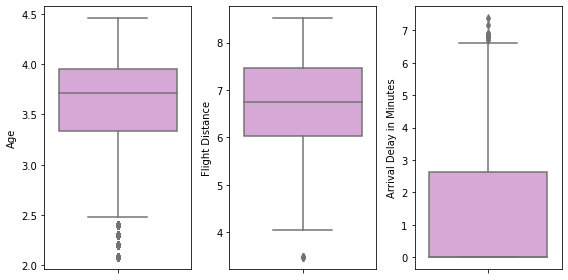

In [ ]:
#Cek dengan boxplot
numerical1 = ['Age', 'Flight Distance', 'Arrival Delay in Minutes']
plt.figure(figsize=(8,4))

# plotting
features = numerical1
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=satisf_baru2[features[i]], color='plum')
    plt.tight_layout()

- Pada boxplot masih terlihat adanya outlier tetapi tidak sebesar sebelumnya. Untuk kali ini tidak akan di drop karena masih memuat informasi yang berguna.

In [ ]:
satisf_baru2.describe()

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction,Gender_Female,Gender_Male,Customer Type_Disloyal Customer,Customer Type_Loyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,3.611921,2.028103,6.705596,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,...,3.640428,3.286351,1.269337,0.433333,0.507459,0.492541,0.182678,0.817322,0.689627,0.310373
std,0.446285,0.962858,0.915590,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,...,1.175663,1.312273,1.630834,0.495538,0.499947,0.499947,0.386404,0.386404,0.462649,0.462649
min,2.079442,1.000000,3.465736,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.332205,1.000000,6.028279,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,3.713572,2.000000,6.738152,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,...,4.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,3.951244,3.000000,7.463937,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,...,5.000000,4.000000,2.639057,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,4.454347,3.000000,8.513988,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,7.368340,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


All Done!!

## 4. Machine Learning

- Positive = Penumpang yang merasa puas
- Negative = Penumpang yang tidak merasa puas

- False Negative = Penumpang yang merasa puas tetapi dikira netral/tidak merasa puas
- False Positive = Penumpang yang merasa netral/tidak puas tetapi dikira merasa puas

**Target = Meminimalisir false positive**,
Fokus kasus yaitu meminimalisir false positif karena orang yang aslinya tidak puas tapi dikiranya puas sehingga yang aslinya tidak puas tadi tidak diberikan kompensasi atas ketidak puasannya sehingga menyebabkan penumpang tidak lagi mau menggunakan maskapai tersebut dan menginformasikan kepada orang lain

In [ ]:
# split data
from sklearn.model_selection import train_test_split

satisf_baru2_train, satisf_baru2_test = train_test_split(satisf_baru2,
                                                         test_size = 0.20, random_state = 1) 

In [ ]:
X_train_data = satisf_baru2_train.loc[:, satisf_baru2_train.columns!='satisfaction']
y_train_data = satisf_baru2_train.loc[:, satisf_baru2_train.columns=='satisfaction']

X_test_data = satisf_baru2_test.loc[:, satisf_baru2_test.columns!='satisfaction']
y_test_data = satisf_baru2_test.loc[:, satisf_baru2_test.columns=='satisfaction']

In [ ]:
satisf_baru2['satisfaction'].value_counts()

0    58879
1    45025
Name: satisfaction, dtype: int64

In [ ]:
!pip install imblearn

You should consider upgrading via the 'C:\Users\ZenBook\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [ ]:
def evaluate(model, x_test = X_test_data, y_test = y_test_data):
    y_pred = model.predict(x_test)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('------')
    print('Confusion Matrix:')
    print()
    print(classification_report(y_test, y_pred))
    print('------')
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('Assuming 1 as positive, we get:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)
    
    print('')
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-Score:', 2 * (precision * recall)/(precision + recall))

### 4.1 K-Nearest Neighbor

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train_data, y_train_data)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
evaluate(knn)

Accuracy: 0.9283480102016265
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     11875
           1       0.94      0.89      0.91      8906

    accuracy                           0.93     20781
   macro avg       0.93      0.92      0.93     20781
weighted avg       0.93      0.93      0.93     20781

------
Assuming 1 as positive, we get:

True Positive: 7908
True Negative: 11384
False Positive: 491
False Negative: 998

Precision: 0.9415406596023336
Recall: 0.8879407141253087
F1-Score: 0.9139555041895405


Precision memiliki nilai yang cukup baik. Namun akan dicoba cara iterasi untuk n_neighbor

In [ ]:
def evaluate_precision(model, x_test = X_test_data, y_test = y_test_data):
    y_pred = model.predict(x_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    return precision

In [ ]:
precision_dict = {
    'n':[],
    'precision':[]
}
for n in [3,5,7,9,11,13,15,17,19,21,23,25,27,29]:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train_data, y_train_data)
    precision = evaluate_precision(knn)
    precision_dict['n'].append(n)
    precision_dict['precision'].append(precision)
    
precision_satisf_baru2 = pd.DataFrame(precision_dict)

In [ ]:
precision_satisf_baru2.sort_values(['precision'], ascending = False)

,n,precision
6,15,0.930129
7,17,0.929898
9,21,0.929198
13,29,0.928630
10,23,0.928538
12,27,0.928504
11,25,0.928253
5,13,0.928239
3,9,0.928141
4,11,0.928041


In [ ]:
#Tuning F1 score untuk mendapat hasil n yang akan dipilih
def evaluate_f1(model, x_test = X_test_data, y_test = y_test_data):
    y_pred = model.predict(x_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    f1_score = 2 * (precision * recall) / (precision + recall)
    
    return f1_score

In [ ]:
f1_dict = {
    'n':[],
    'f1-score':[]
}
for n in [3,5,7,9,11,13,15,17,19,21,23,25,27,29]:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train_data, y_train_data)
    f1 = evaluate_f1(knn)
    f1_dict['n'].append(n)
    f1_dict['f1-score'].append(f1)
    
f1_satisf_baru2 = pd.DataFrame(f1_dict)

In [ ]:
f1_satisf_baru2.sort_values('f1-score', ascending = False)

,n,f1-score
3,9,0.915064
1,5,0.914329
2,7,0.913956
4,11,0.913430
5,13,0.912925
6,15,0.912685
0,3,0.912537
8,19,0.911766
7,17,0.911744
10,23,0.911251


- Setelah dilakukan iterasi berdasarkan precision dan f1 score, didapatkan bahwa yang memiliki score terbesar adalah n = 17

In [ ]:
X_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20781 entries, 65830 to 25731
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                20781 non-null  float64
 1   Class                              20781 non-null  int64  
 2   Flight Distance                    20781 non-null  float64
 3   Inflight wifi service              20781 non-null  int64  
 4   Departure/Arrival time convenient  20781 non-null  int64  
 5   Ease of Online booking             20781 non-null  int64  
 6   Gate location                      20781 non-null  int64  
 7   Food and drink                     20781 non-null  int64  
 8   Online boarding                    20781 non-null  int64  
 9   Seat comfort                       20781 non-null  int64  
 10  Inflight entertainment             20781 non-null  int64  
 11  On-board service                   20781 non-null 

In [ ]:
final_knn = KNeighborsClassifier(n_neighbors = 15)
final_knn.fit(X_train_data, y_train_data)

KNeighborsClassifier(n_neighbors=15)

In [ ]:
evaluate(final_knn)

Accuracy: 0.9277224387661807
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     11875
           1       0.95      0.88      0.91      8906

    accuracy                           0.93     20781
   macro avg       0.93      0.92      0.93     20781
weighted avg       0.93      0.93      0.93     20781

------
Assuming 1 as positive, we get:

True Positive: 7850
True Negative: 11429
False Positive: 446
False Negative: 1056

Precision: 0.9462391513982642
Recall: 0.8814282506175612
F1-Score: 0.9126845715614464


In [308]:
predict = pd.DataFrame(X_test_data.iloc[0:10,:])
predict

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Disloyal Customer,Customer Type_Loyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel
65830,3.737670,1,5.717028,5,3,3,3,5,5,5,...,5,5,5,0.000000,0,1,0,1,1,0
41026,2.944439,3,5.971262,1,5,5,5,1,1,1,...,1,4,1,2.890372,1,0,0,1,1,0
95867,2.639057,2,6.345636,2,4,2,3,1,2,1,...,5,5,1,0.000000,1,0,0,1,0,1
75679,3.178054,1,4.700480,1,0,1,1,3,1,1,...,3,1,3,0.000000,0,1,1,0,1,0
52958,3.178054,3,4.430817,4,5,0,3,5,0,5,...,3,5,5,0.000000,0,1,0,1,0,1
91655,3.970292,1,5.768321,3,5,4,5,3,3,3,...,3,3,3,4.276666,0,1,0,1,1,0
91131,3.912023,3,7.677864,2,1,1,1,5,4,3,...,4,2,4,0.000000,1,0,0,1,1,0
8045,4.110874,1,6.472346,2,3,2,3,3,3,3,...,4,2,3,1.945910,1,0,0,1,0,1
18698,3.737670,3,7.363280,2,1,1,1,1,4,4,...,2,2,2,2.397895,1,0,0,1,1,0
33052,3.912023,3,7.447751,4,4,4,4,3,2,4,...,3,5,2,0.000000,0,1,0,1,1,0


In [309]:
final_knn.predict(predict)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [312]:
y_test_data.iloc[0:10,:]

,satisfaction
65830,1
41026,0
95867,0
75679,0
52958,0
91655,0
91131,0
8045,0
18698,0
33052,1


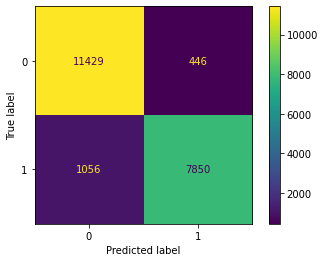

In [ ]:
plot_confusion_matrix(final_knn, X_test_data, y_test_data)

### 4.2 Decision Tree

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train_data, y_train_data)
evaluate(dt)

Accuracy: 0.9448053510418171
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.96      0.95      0.95     11875
           1       0.93      0.94      0.94      8906

    accuracy                           0.94     20781
   macro avg       0.94      0.94      0.94     20781
weighted avg       0.94      0.94      0.94     20781

------
Assuming 1 as positive, we get:

True Positive: 8394
True Negative: 11240
False Positive: 635
False Negative: 512

Precision: 0.9296710599180419
Recall: 0.9425106669660903
F1-Score: 0.9360468357959297


In [310]:
dt.predict(predict)

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1])

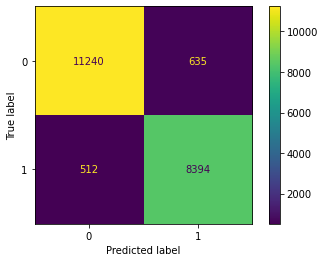

In [ ]:
plot_confusion_matrix(dt, X_test_data, y_test_data)

### 4.3 Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train_data, y_train_data)

LogisticRegression()

In [ ]:
evaluate(logreg)

Accuracy: 0.8777729656898128
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.88      0.91      0.89     11875
           1       0.87      0.84      0.85      8906

    accuracy                           0.88     20781
   macro avg       0.88      0.87      0.87     20781
weighted avg       0.88      0.88      0.88     20781

------
Assuming 1 as positive, we get:

True Positive: 7483
True Negative: 10758
False Positive: 1117
False Negative: 1423

Precision: 0.8701162790697674
Recall: 0.8402200763530204
F1-Score: 0.8549068890666056


In [311]:
logreg.predict(predict)

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1])

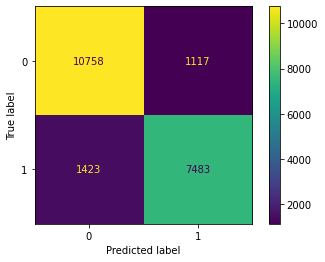

In [ ]:
plot_confusion_matrix(logreg, X_test_data, y_test_data)

### 4.4 Random Forest

#### 4.4.1 Random forest biasa

In [ ]:
base = RandomForestClassifier()
base.fit(X_train_data, y_train_data)
evaluate(base)

Accuracy: 0.9619845050767528
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11875
           1       0.97      0.94      0.95      8906

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781

------
Assuming 1 as positive, we get:

True Positive: 8380
True Negative: 11611
False Positive: 264
False Negative: 526

Precision: 0.9694585839888941
Recall: 0.9409386930159443
F1-Score: 0.9549857549857551


In [306]:
base.predict(predict)

array([1, 0, 0, ..., 1, 0, 1])

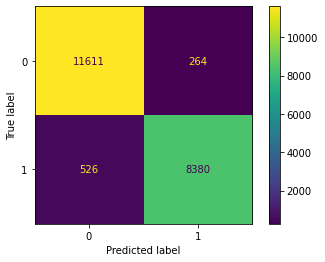

In [ ]:
plot_confusion_matrix(base, X_test_data, y_test_data)

#### 4.4.2 Random forest Undersampling

In [ ]:
print("Sebelum di-undersample", Counter(y_train_data['satisfaction']))

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
x_train_under, y_train_under = undersample.fit_resample(X_train_data, 
                                                        y_train_data)

print("Setelah di-undersample", Counter(y_train_under['satisfaction']))

Sebelum di-undersample Counter({0: 47004, 1: 36119})
Setelah di-undersample Counter({0: 36119, 1: 36119})


In [ ]:
model_u = RandomForestClassifier(random_state = 1)
model_u.fit(x_train_under, y_train_under)
evaluate(model_u, X_test_data, y_test_data)

Accuracy: 0.9589047687791733
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     11875
           1       0.96      0.95      0.95      8906

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781

------
Assuming 1 as positive, we get:

True Positive: 8438
True Negative: 11489
False Positive: 386
False Negative: 468

Precision: 0.9562556663644606
Recall: 0.9474511565236919
F1-Score: 0.9518330513254372


In [ ]:
model_u.predict(predict)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1])

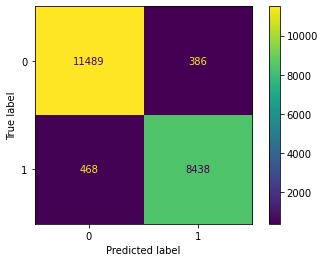

In [ ]:
plot_confusion_matrix(model_u, X_test_data, y_test_data)

#### 4.4.3 Random Forest Oversampling

In [ ]:
print("Sebelum di-undersample", Counter(y_train_data['satisfaction']))

# define undersample strategy
SMOTE = SMOTE()

# fit and apply the transform
x_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train_data, y_train_data)

print("Sesudah di-undersample", Counter(y_train_SMOTE['satisfaction']))

Sebelum di-undersample Counter({0: 47004, 1: 36119})
Sesudah di-undersample Counter({0: 47004, 1: 47004})


In [ ]:
model_o = RandomForestClassifier(random_state = 1, n_jobs = -1)
model_o.fit(x_train_SMOTE, y_train_SMOTE)
evaluate(model_o, X_test_data, y_test_data)

Accuracy: 0.9600596698907656
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     11875
           1       0.96      0.94      0.95      8906

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781

------
Assuming 1 as positive, we get:

True Positive: 8414
True Negative: 11537
False Positive: 338
False Negative: 492

Precision: 0.9613802559414991
Recall: 0.9447563440377273
F1-Score: 0.9529958092649224


In [ ]:
model_o.predict(predict)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1])

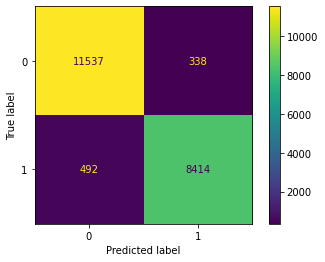

In [ ]:
plot_confusion_matrix(model_o, X_test_data, y_test_data)

#### 4.4.3 Random Forest Combining Oversamplind & Undersampling

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

### Combined Model
# define pipeline
combined_model = RandomForestClassifier(n_jobs = -1)
over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.9)
steps = [('o', over), ('u', under), ('model', combined_model)]
pipeline = Pipeline(steps=steps)

# evaluate pipeline
pipeline.fit(X_train_data, y_train_data)
evaluate(pipeline, X_test_data, y_test_data)

Accuracy: 0.9609258457244598
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     11875
           1       0.96      0.95      0.95      8906

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781

------
Assuming 1 as positive, we get:

True Positive: 8420
True Negative: 11549
False Positive: 326
False Negative: 486

Precision: 0.962725817516579
Recall: 0.9454300471592185
F1-Score: 0.9539995467935645


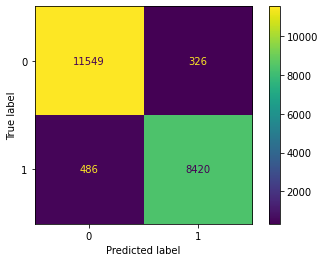

In [ ]:
plot_confusion_matrix(pipeline, X_test_data, y_test_data)

### Kesimpulan Modelling
1. K-Nearest Neighbor
    - Accuracy = 0,927
    - Score precision = 0,94
2. Decision Tree
    - Accuracy = 0,94
    - Score precision = 0,93
3. Logistic Regression
    - Accuracy = 0,88
    - Score precision = 0,87
4. Random Forest Biasa
    - Accuracy = 0,962
    - Score precision = 0,97
5. Random Forest Undersampling
    - Accuracy = 0,96
    - Score precision = 0,956
6. Random Forest Oversampling
    - Accuracy = 0,96
    - Score precision = 0,96
7. Combining Random Forest Oversampling & Undersampling
    - Accuracy = 0,961
    - Score precision = 0,963
8. The Best Coeficient (0.8 & 0.8)
    - Accuracy = 0,962
    - Score precision = 0,97
- Berdasarkan modelling yang telah dilakukan dengan berbagai algorithma, maka bisa digunakan Random Forest biasa karena memiliki accurasy yang besar yaitu sebesar 0,963 serta precision sebesar 0,97

## Feature Importance

In [ ]:
!pip install dalex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 32.7 MB/s 
  Created wheel for dalex: filename=dalex-1.5.0-py3-none-any.whl size=1043321 sha256=8cba9ccd487adf7a5586f803e11a9b8da224081cdfcdff71e03fbc5b7b0e687a
  Stored in directory: /root/.cache/pip/wheels/76/31/8c/c78df586df31b3f3e0c4ecc759ee73e175545cff5548201996
Successfully built dalex


In [ ]:
import dalex as dx

In [ ]:
ranfor_imp = dx.Explainer(base, X_train_data, y_train_data, label = 'Random Forest Interpretation')

Preparation of a new explainer is initiated

  -> data              : 83123 rows 24 cols
  -> target variable   : Parameter 'y' was a pandas.DataFrame. Converted to a numpy.ndarray.
  -> target variable   : 83123 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Random Forest Interpretation
  -> predict function  : <function yhat_proba_default at 0x7f1b1d2a19e0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.434, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.42, mean = 3.25e-05, max = 0.48
  -> model_info        : package sklearn

A new explainer has been created!


In [ ]:
ranfor_imp.model_parts().plot()
plt.figure(figsize=(20,30))

<Figure size 1440x2160 with 0 Axes>

<Figure size 1440x2160 with 0 Axes>

- Berdasarkan feature importance didapatkan bahwa terdapat 10 fitur yang mempengaruhi tingkat kepuasan penumpang.
- Fitur yang paling berpengaruh kebanyakan memang terkait dengan pelayanan yang diberikan maskapai.Dan berdasarkan gambar diatas inflight wifi service merupakan fitur yang paling berpengaruh terhadap tingkat kepuasan penumpang

## Rekomendasi

1. Meningkatkan pelayanan untuk pesawat tipe kelas Eco.
2. Perlu ditingkatkannya pelayanan terkait dengan `Depart/Arrival time convenient`, `Ease of Online booking`, dan `Online boarding` dikarenakan banyak sekali penumpang yang memberikan rate kecil.
